## Histogram

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

### Plotting Histograms

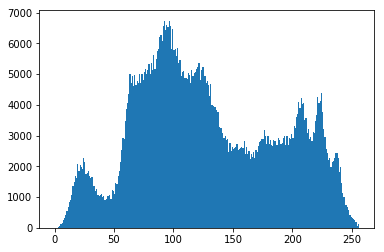

In [11]:
img = cv2.imread('images/lenna.bmp')
plt.hist(img.ravel(),256,[0,256])
plt.show()

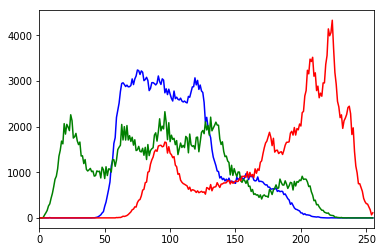

In [12]:
#채널별 히스토그램 계산하여 출력
#opencv 함수로 히스토그램 계산 (cv.calcHist)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256]) #채널별 히스토그램 계산
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

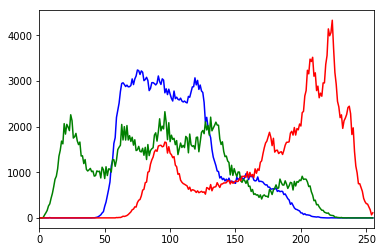

In [13]:
#numpy 함수로  채널별 히스토그램 계산하여 출력
#이미지 채널 분리
bi,gi,ri = cv2.split(img)
img = [bi,gi,ri]
for i,col in enumerate(color):
    hist, bins = np.histogram (img[i].ravel (), 256, [0,256]) 
    plt.plot(hist,color = col)
    plt.xlim([0,256])
plt.show()

### mask를 적용한 Histogram

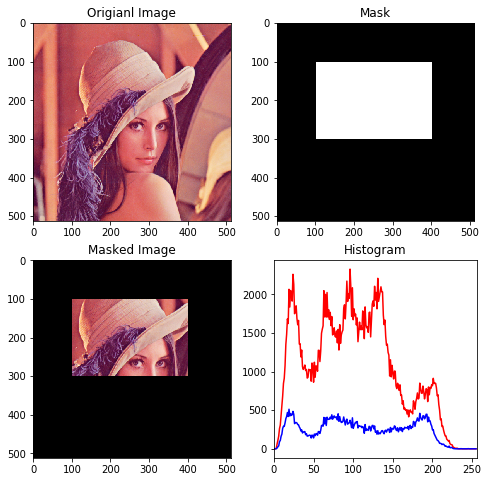

In [16]:
img = cv2.imread('images/lenna.bmp');
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# mask생성
mask = np.zeros(img.shape[:2],np.uint8)
mask[100:300,100:400] = 255

# 이미지에 mask가 적용된 결과
masked_img = cv2.bitwise_and(img,img,mask=mask)

# 원본 이미지의 히스토그램
hist_full = cv2.calcHist([img],[1],None,[256],[0,256])

# mask를 적용한 히스트로그램
hist_mask = cv2.calcHist([img],[1],mask,[256],[0,256])

plt.figure(figsize=(8,8))

plt.subplot(221),plt.imshow(img,'gray'),plt.title('Origianl Image')
plt.subplot(222),plt.imshow(mask,'gray'),plt.title('Mask')
plt.subplot(223),plt.imshow(masked_img,'gray'),plt.title('Masked Image')

# red는 원본이미지 히스토그램, blue는 mask적용된 히스토그램
plt.subplot(224),plt.title('Histogram')
plt.plot(hist_full,color='r'),plt.plot(hist_mask,color='b')
plt.xlim([0,256])

plt.show()